# **Projecto Final**



*   *Juan Pablo Fernández Delgado*

## Healthcare Dataset Stroke Data 


---
Nota: subir el archivo train_2v.csv


**Descripción detallada de los datos e instrucciones**


*   Predecir si un paciente tendrá un accidente cerebrovascular o no basado en algunos atributos dados














Variable | Definicion | Clasificacion
--- | --- | ---
Id | Patient ID | Nada
Gender | Gender of Patient | One hot encoding
Age | Age of Patient | One hot encoding, Categorizacion por rango de edad
Hypertension | 0 - no hypertension, 1 - suffering from hypertension | Nada
Heart_diseas | 0 - no heart disease, 1 - suffering from heart disease | Nada
Ever_married | Yes/No | One hot encoding
Work_type | Type of occupation | One hot encoding
Residence_type | Area type of residence (Urban/ Rural) | One hot encoding
Avg_glucose_level | Average Glucose Level (measured after meal) | One hot encoding, Normalización
bmi | Body mass index | One hot encoding, Normalización, N/As
Smoking_status | Patient's smoking status | One hot encoding, N/As
Stroke | 0 - no stroke, 1 - suffered stroke | Dato a predecir


Nota: Las clasificaciones se detallan en la columna de clasificación de la variable. Nada: es que se dejó el valor igual a como viene, One hot encoding para las características categóricas, el rango de edad se realizó como se pide en el documento de la tarea, N/As Nomenclatura utilizada cuando hay datos faltantes y la Normalización ( x – min(x) ) / ( max(x) – min(x) ).

In [0]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import solve
%matplotlib inline

**Predicción con regresión logística**

Se utiliza solamente 300 registros
20% para testing 
70% para trainig

In [5]:
# importando el dataset a un Dataframe de Pandas
data = pd.read_csv('train_2v.csv',delimiter=",",  nrows = 300)


# Preprocesamiento y extraccion de caracteristicas

# Descomentar este punto para utilizar datos de training y que sea mas rapida la ejecucion de los puntos.
#data = dataTest
# Eliminamos el ID del dataset
data.drop(data.columns[[0]], axis=1, inplace=True)

# Se cambian los valores nulos por N/As
data["bmi"].fillna(-999, inplace = True) 
data["smoking_status"].fillna("N/As", inplace = True)

# se elimina la columna de prediccion y se almacena an la variable y
y = np.array(data['stroke'])
data = data.drop(['stroke'],1)

print(y)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0]


In [6]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi
count,300.000000,300.000000,300.000000,300.00000,300.000000
mean,43.195067,0.100000,0.053333,110.52180,6.036000
std,21.849137,0.300501,0.225073,47.11608,155.833644
min,0.640000,0.000000,0.000000,55.39000,-999.000000
25%,25.000000,0.000000,0.000000,79.30500,23.875000
50%,43.000000,0.000000,0.000000,94.39000,28.350000
75%,61.000000,0.000000,0.000000,120.75750,35.000000
max,82.000000,1.000000,1.000000,251.60000,64.800000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
gender               300 non-null object
age                  300 non-null float64
heart_disease        300 non-null int64
ever_married         300 non-null object
work_type            300 non-null object
Residence_type       300 non-null object
avg_glucose_level    300 non-null float64
bmi                  300 non-null float64
smoking_status       300 non-null object
AgeRange             300 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 23.5+ KB


In [11]:
data.columns

Index(['gender', 'age', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'AgeRange'],
      dtype='object')

# Preprocesamiento, extraccion de caracteristicas y Evaluación 


1.   Controlando valores nulos (N/As)
2.   Categorizacion por rango de edad
3.   One hot encoding
4.   Graficos antes
5.   Normalización (MinMaxScaler)
6.   Covarianza





In [7]:

# Controlando valores nulos
data.isnull().any().any()

False

In [0]:
# Se categoriza por rango de edad: niño, adolescente, adulto_mayor
bins = [0, 12, 18]
names = ['niño', 'adolescente', 'adulto_mayor']

d = dict(enumerate(names, 1))

data['AgeRange'] = np.vectorize(d.get)(np.digitize(data['age'], bins))
data.drop(data.columns[[2]], axis=1, inplace=True)
# se muestran los datos por rangos de edad
#data



Visualización de Datos sin procesar

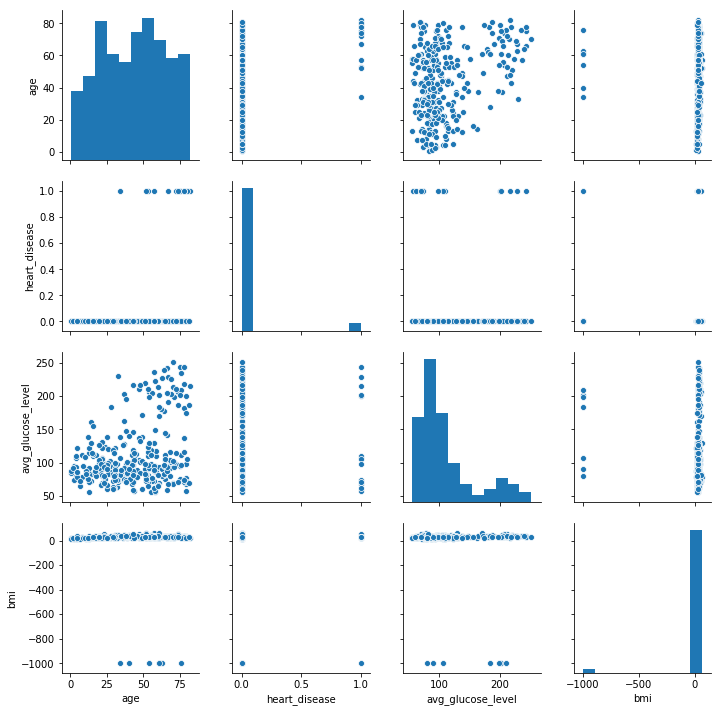

In [14]:
#EDA
sns.pairplot(data)

In [0]:
sns.distplot(data['stroke'])

In [0]:
# se crea un set de variables par aplicar el one hot encoding de las columnas: 'AgeRange','gender', 'ever_married','work_type','Residence_type','smoking_status'

df_oh_data = pd.get_dummies(data, columns=['AgeRange','gender', 'ever_married','work_type','Residence_type','smoking_status'], drop_first=True)
#df_oh_data


In [0]:
# se normalizan las columnas: avg_glucose_level y bmi
from sklearn.preprocessing import MinMaxScaler
  
scaler = MinMaxScaler()
df_oh_data[['avg_glucose_level', 'bmi']] = scaler.fit_transform(df_oh_data[['avg_glucose_level', 'bmi']])
#df_oh_data

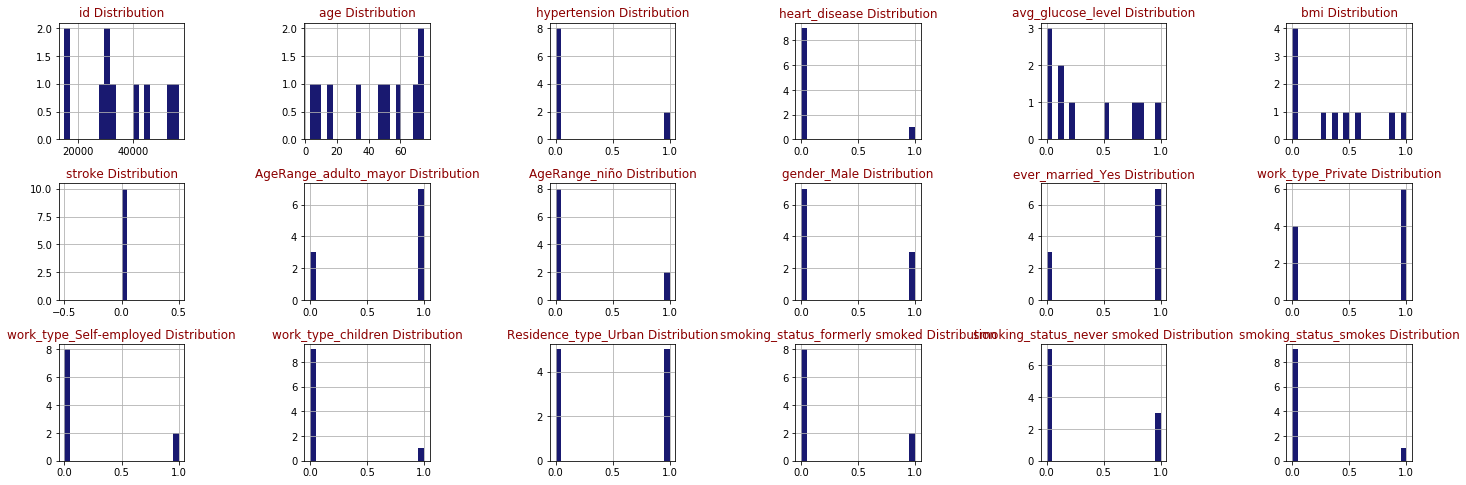

In [0]:
# Graficando con los datos procesados
draw_histograms(df_oh_data,df_oh_data.columns,9,6)

In [0]:
#Covarianza entre avg_glucose_level y bmi
np.cov(df_oh_data["avg_glucose_level"], df_oh_data["bmi"])

array([[ 0.05766284, -0.00451147],
       [-0.00451147,  0.02145865]])

In [0]:
df_oh_data.head()

,age,heart_disease,avg_glucose_level,bmi,AgeRange_adulto_mayor,AgeRange_niño,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,3.0,0,0.202487,0.956007,0,1,1,0,0,0,0,1,0,0,0,0
1,58.0,0,0.165996,0.975935,1,0,1,1,0,1,0,0,1,0,1,0
2,8.0,0,0.282860,0.955631,0,1,0,0,0,1,0,0,1,0,0,0
3,70.0,0,0.069568,0.972833,1,0,0,1,0,1,0,0,0,1,0,0
4,14.0,0,0.539677,0.957041,0,0,1,0,1,0,0,0,0,0,0,0


In [0]:
# Se optiene la cantidad de columnas a procesar
total_columnas = df_oh_data.shape[1]
total_columnas


16

In [0]:
# Cantidad de columnas por filas
X = np.array(df_oh_data)
X.shape

(300, 16)

In [0]:
lRegression = linear_model.LogisticRegression()
lRegression.fit(X,y)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#logreg = LogisticRegression()
#model = linear_model.LogisticRegression()
#model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# Se crea el modelo y se ajusta el fit a la entrada de datos originales
predictions = lRegression.predict(X)
predictions[0:300]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
# Se confirma la exactitud del modelo
lRegression.score(X,y)

0.9766666666666667

In [0]:
# Se divide el conjunto de datos en un set de entrenamiento y otro para pruebas

validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [0]:
# Se valida el modelo con el 80% aplicando kfolss

name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(lRegression, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
msg

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

'Logistic Regression: 0.983333 (0.027639)'

In [0]:
predictions = lRegression.predict(X_test)
accuracy_score(Y_test, predictions)

0.95

In [0]:
# Utilizamos la matrix de consufion y validamos la presicion
print(confusion_matrix(Y_test, predictions))

[[57  0]
 [ 3  0]]


In [0]:
#Reporte de clasificacion.
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        57
           1       0.00      0.00      0.00         3

    accuracy                           0.95        60
   macro avg       0.47      0.50      0.49        60
weighted avg       0.90      0.95      0.93        60



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Analisis de curva ROC

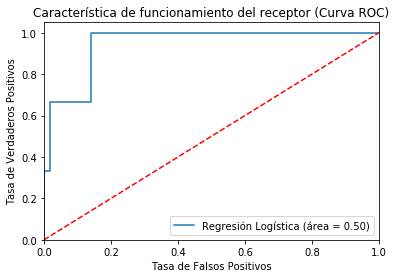

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#model.predict(X_test)
#X_test
#X_train, X_validation, Y_train, Y_validation
#y_train
#Y_train

logit_roc_auc = roc_auc_score(Y_test, lRegression.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, lRegression.predict_proba(X_test)[:,1])

#logit_roc_auc = roc_auc_score(Y_train, model.predict(X_train))
#fpr, tpr, thresholds = roc_curve(Y_train, model.predict_proba(X_train)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica de funcionamiento del receptor (Curva ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Prediccion con perceptron multi capa**

1.   Código que itera sobre los K folds.
2.   Evaluación con curva ROC y el área bajo la misma
3.   Documentación en prosa, grá􀂦cos y, preferiblemente, en código de las mejoras que buscaron los
estudiantes para mejorar los resultados con la red neuronal.


In [0]:
#Import necessary packages, torch, numpy, pylab
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.init as init

In [0]:
#type for tensors
dtype = torch.FloatTensor
#context and input layer concatenated size, hidden layer dimension
inputLayerSize, hiddenLayerSize, outputLayerSize = 16, 16, 1
#number of epochs for training
epochs = 1000
#model learning rate
learningRate = 1
sigmoid = torch.nn.Sigmoid()
#sequence of the wave to estimate
sequenceLength = 100;

In [0]:

"""
Creates the input and ground truth data
@param sequenceLength, sequence length to generate
@return yInput and yTarget
"""
def createInputAndGroundTruthData(sequenceLength):
    #create data steps from 2 to 10 with the given sequence length
    XInput = np.linspace(0, 1, sequenceLength)
    #create numpy array with sin(x) input
    yNp = np.sin(XInput) ;
    XInput.resize((sequenceLength, 1));
    yNp.resize((sequenceLength, 1))
    #create the input time series for the model, with one unit of delay, is no model parameter, no grad needed
    
    XInput = torch.Tensor(XInput).type(dtype)
    YInput = torch.sin(XInput)
    return (XInput, YInput)
  

def createXORData():
  XInput = torch.Tensor([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]]);
  YInput = torch.Tensor([[0],[1],[1], [0]] );
  return (XInput, YInput);
  
def createXORStroke():
  XInput = torch.Tensor(X_test);
  YInput = torch.Tensor(Y_test);
  return (XInput, YInput);

In [0]:
createXORData()
#createXORStroke()

(tensor([[1., 0., 0.],
         [1., 0., 1.],
         [1., 1., 0.],
         [1., 1., 1.]]), tensor([[0.],
         [1.],
         [1.],
         [0.]]))

In [0]:
"""
Creates the matrices for the Elman model, in this case W1 and V
@param contextConcatInputLayerSize
@param hiddenLayerSize
@param outputLayerSize
@return W1 and V parameter matrices
"""
def createMultilayerPerceptronParameters(inputLayerSize, hiddenLayerSize, outputLayerSize):
    #W1 with contextConcatInputLayerSize x hiddenLayerSize dimensions
    Wo = torch.FloatTensor(inputLayerSize, hiddenLayerSize).type(dtype)
    #randomly init W1 parameter matrix with mean 0 and std 0.4
    init.uniform_(Wo, 0.0, 1.0)
    #BIAS CORRECTION
    Wo[:, 0] = float('NaN');
    #pytorch variable with grad requirement
    #Wo = Variable(Wo, requires_grad = False)
    # randomly init Ws parameter matrix with mean 0 and std 0.3
    #+ 1 for the bias
    Ws = torch.FloatTensor(hiddenLayerSize, outputLayerSize).type(dtype)
    init.uniform_(Ws, 0.0, 1.0)
    
    return (Wo, Ws)



def createMultilayerPerceptronParametersTest(inputLayerSize, hiddenLayerSize, outputLayerSize):
    #W1 with contextConcatInputLayerSize x hiddenLayerSize dimensions
    Wo = torch.FloatTensor([[0, -1, 0], [0, 3, -2], [0, 1, 2]]).type(dtype)
    #randomly init W1 parameter matrix with mean 0 and std 0.4
    
    Ws = torch.FloatTensor([[ -1], [-2], [3]]).type(dtype)
    
    #DeltaO = torch.FloatTensor(hiddenLayerSize, 1).type(dtype)
    #DeltaS = torch.FloatTensor(outputLayerSize, 1).type(dtype)
    
    return (Wo, Ws)

In [0]:
"""
Evaluates the model
@param Wo, Hidden weights, inputLayerSize x hiddenLayerSize
@param Ws, OutputNetValues, hiddenLayerSize x outputLayerSize
@param X, NumSamples x inputLayerSize
@return HiddenOutput: NumSamples x  hiddenLayerSize, OutputNetValues
"""
def forwardPass(Wo, Ws, X):
  #X dims: NumSamples x inputLayerSize
  #Wo dims: inputLayerSize x hiddenLayerSize
  #HiddenNetValues: NumSamples x  hiddenLayerSize
  HiddenNetValues = X.mm(Wo);   
  HiddenOutput = sigmoid(HiddenNetValues);
  #forced bias
  HiddenOutput[:,0] = 1;
  #Ws: hiddenLayerSize x outputLayerSize
  OutputNetValues = HiddenOutput.mm(Ws);    
  #print("Output net values")
  #print(OutputNetValues)      
  #OutputNetValues: NumSamples x outputLayerSize
  Output = sigmoid(OutputNetValues);      
  return (HiddenOutput, OutputNetValues, Output);

"""
Evaluates the error for a given set of outputs, and target values
@param T, target values: Samples x inputLayerSize
@param Yestim, model output: Samples x inputLayerSize
@return error, scalar
"""
def evaluateError(Yestim, T):
  #Element wise power

  YdiffSquare = (Yestim - T)**2;  
  error = sum(YdiffSquare);
  return error;

"""
Updates the output layer weights
@param Output: NumSamples x outputLayerSize
@param T: NumSamples x outputLayerSize
@param HiddenOutput: NumSamples x  hiddenLayerSize
@param Ws, OutputNetValues, hiddenLayerSize x outputLayerSize
"""
def updateOutputWeights(Ws, HiddenOutput, T, Output, alpha):
  #element wise multiplication, to keep a delta per samples
  #deltaS: NumSamples x outputLayerSize
  deltaS = (Output - T).mul(((1 - Output).mul(Output))); 
  #HiddenOutputTrans: hiddenLayerSize x NumSamples
  HiddenOutputTrans = HiddenOutput.transpose(0, 1)
  #deltaWs: hiddenLayerSize x outputLayerSize
  deltaWs = HiddenOutputTrans.mm(deltaS);   
  Wsn = Ws - alpha * deltaWs;  
  #print("deltaS")
  #print(deltaS)
 
  #print("deltaWs")
  #print(deltaWs)
    
  return (deltaS, Wsn)


"""
Updates hidden layer weights
@param deltaS: Numsamples x outputLayerSize
@param Ws: hiddenLayerSize x outputLayerSize
@param HiddenOutput: NumSamples x  hiddenLayerSize
@param X: NumSamples x inputLayerSize
"""
def updateHiddenWeights(X, Wo, Ws, deltaS, HiddenOutput, alpha):
  #Fac1: Numsamples x hiddenLayerSize (mul, element wise multiplication)
  Fac1 = (1 - HiddenOutput).mul(HiddenOutput)
  Wst = Ws.transpose(0, 1)
  #Fac2: Numsamples x hiddenLayerSize
  Fac2 = deltaS.mm(Wst)
  #DeltaO: Numsamples x hiddenLayerSize
  DeltaO = Fac2.mul(Fac1);

  #print("DeltaO")
  #print(DeltaO);
    

  #Xtrans: inputLayerSize x NumSamples
  Xtrans = X.transpose(0, 1);
  #WdeltaO  inputLayerSize x hiddenLayerSize
  WdeltaO = Xtrans.mm(DeltaO);
    
    
  #print("WdeltaO")
  #print(WdeltaO)
    
  Won = Wo - alpha * WdeltaO;
  #BIAS CORRECTION
  Won[:, 0] = float('NaN');
  return Won;
  

In [0]:

def pruebaXOR():
  
    #createXORData()
    #createXORStroke()
    
    #(X, T) = createInputAndGroundTruthData(sequenceLength);
    #(X, T) = createXORData()
    (X_pm, T_pm) = createXORStroke()
    
   # print("X ", X)
   # print("T ", T)
    
    #print(yInput)
    #print(yInput.shape)
    (Wo, Ws) = createMultilayerPerceptronParameters(inputLayerSize, hiddenLayerSize, outputLayerSize)
    
    for epoch in range(epochs):
    
      (HiddenOutput, OutputNetValues, Output) = forwardPass(Wo, Ws, X_pm);
      error = evaluateError(Output, T_pm);
      if(epoch % 10 == 0):
          print("Current epoch: ", epoch, " and error: ", error)          
      (deltaS, Wsn) = updateOutputWeights(Ws, HiddenOutput, T_pm, Output, learningRate);

      Won = updateHiddenWeights(X_pm, Wo, Ws, deltaS, HiddenOutput, learningRate)
      Wo = Won;
      #print("Won ")
      #print(Won)
      Ws = Wsn;
    
    
def pruebaPesos():
    x = torch.FloatTensor([[1, 0, 1], [1, 0, 1]])
    t = torch.FloatTensor([[0],[0]])
    alpha = 1
    (Wo, Ws) = createMultilayerPerceptronParametersTest(inputLayerSize, hiddenLayerSize, outputLayerSize)
    
    #test forward pass
    (HiddenOutput, OutputNetValues, Output) = forwardPass(Wo, Ws, x)  
    #test output weights update
    (deltaS, Wsn) = updateOutputWeights(Ws, HiddenOutput, t, Output, alpha)
    print("Wsn")
    print(Wsn)
    #test hidden weights update
    Won = updateHiddenWeights(x, Wo, Ws, deltaS, HiddenOutput, alpha)
    print("Won ")
    print(Won)
"""
Funcion principal
"""
def main():
    pruebaXOR()

if __name__ == '__main__':
    main()

Current epoch:  0  and error:  tensor([5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01,
        5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01, 1.7520e-06, 5.9980e+01,
        5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01,
        5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01,
        5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01,
        5.9980e+01, 5.9980e+01, 1.7520e-06, 5.9980e+01, 5.9980e+01, 5.9980e+01,
        5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01,
        1.7520e-06, 5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01,
        5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01,
        5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01, 5.9980e+01])


RuntimeError: ignored

In [0]:
epochs

1000

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#model.predict(X_test)
#X_test
#X_train, X_validation, Y_train, Y_validation
#y_train
#Y_train

logit_roc_auc = roc_auc_score(T_pm, lRegression.predict(X_pm))
fpr, tpr, thresholds = roc_curve(T_pm, lRegression.predict_proba(X_pm)[:,1])

#logit_roc_auc = roc_auc_score(Y_train, model.predict(X_train))
#fpr, tpr, thresholds = roc_curve(Y_train, model.predict_proba(X_train)[:,1])


plt.figure()
plt.plot(fpr, tpr, label='Regresión Logística (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Característica de funcionamiento del receptor (Curva ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

NameError: ignored

Nota: Para la regresión logística, pude entender más el concepto y fue un poco más fácil aplicarlo eso si después de una larga investigación, para la parte del perceptrón, utilice el código propuesto por el profesor, utilizando los datos de testing, pero aun así no lo pude ejecutar bien.